# Pruebas de Hipótesis

## Test sobre una y dos muestras

Se introducen dos funciones: `stats.ttest_1samp` y `stats.wilcoxon` para el test t y el test de Wilcoxon respectivamente. Ambos pueden ser usados para una muestra o dos muestras así como para datos pareados. Note que el test de Wilcoxon para dos muestras es lo mismo que el test de Mann–Whitney.

### El test t

Este test se basa en el supuesto de normalidad de los datos. Es decir que los datos $x_1\ldots,x_n$ se asumen como realizaciones independientes de variables aleatorias con media $\mu$ y varianza $\sigma^2$, $N(\mu, \sigma^2)$. Se tiene que la hipótesis nula es que $\mu=\mu_0$.

Se puede estimar los parámetros $\mu$ y $\sigma$ por la media $\bar{x}$ y la desviación estándar  $\sigma$, aunque recuerde que solo son estimaciones del valor real.

Veamos un ejemplo del consuo diario de calorías de 11 mujeres:

In [1]:
daily_intake = [5260,5470,5640,6180,6390,6515,
                  6805,7515,7515,8230,8770]

Veamos algunas estadísticas de resumen:

In [2]:
from scipy import stats
import numpy as np
stats.describe(daily_intake)

DescribeResult(nobs=11, minmax=(5260, 8770), mean=6753.636363636364, variance=1304445.4545454548, skewness=0.3674679616524392, kurtosis=-0.9757942883536157)

Se podría querer saber si el consumo de energía de las mujeres se desvía de una valor recomendado de $7725$. Asumiendo que los datos vienen de una distribución normal, el objetivo es hacer una prueba para saber si la media de la distribución es $\mu = 7725$.

In [3]:
stats.ttest_1samp(daily_intake,7725)

TtestResult(statistic=-2.8207540608310193, pvalue=0.018137235176105812, df=10)

In [4]:
t, pval = stats.ttest_1samp(daily_intake,7725)

In [5]:
t

-2.8207540608310193

In [6]:
pval

0.018137235176105812

### Wilcoxon

In [7]:
(rank, pVal) = stats.wilcoxon(x=(np.array(daily_intake)-7725))

In [8]:
(rank, pVal)

(8.0, 0.0244140625)

Para efectos prácticos, cuando se trata de una muestra, el test t y el de Wilcoxon suelen arrojar resultados muy similares.

## Test t para dos muestras

Se usa esta prueba con la hipótesis nula de que dos muestras provengan de distribuciones normales con la misma media.

Se puede tener dos enfoques, que las muestras tengan la misma varianza (enfoque clásico) o difieran en varianza.

In [15]:
import numpy as np
from scipy import stats
import pandas as pd
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/energy.csv"
energy = pd.read_csv(uu)
energy.head()


,expend,stature
0,9.21,obese
1,7.53,lean
2,7.48,lean
3,8.08,lean
4,8.09,lean


In [10]:
g1 = energy[energy.stature=='obese'].expend.values
g2 = energy[energy.stature=='lean'].expend.values
stats.ttest_ind(g2,g1,equal_var=False)

TtestResult(statistic=-3.855503558973697, pvalue=0.0014106918447179043, df=15.91873619676766)

In [11]:
stats.ttest_ind(g2,g1,equal_var=True)

TtestResult(statistic=-3.9455649161549835, pvalue=0.0007989982111700593, df=20.0)

### Comparación de varianzas

Aún cuando en `python` se puede hacer la prueba sobre dos muestras sin el supuesto de igualdad en las varianzas, podrías estar interesado en hacer una prueba exclusiva de este supuesto.

In [12]:
import statistics 
F = statistics.variance(g2)/statistics.variance(g1)
df1 = len(g1) - 1
df2 = len(g2) - 1
alpha = 0.05 
p_value = stats.f.cdf(F, df2, df1)
(F,p_value*2)

(0.7844459792357035, 0.6797459853760682)

### Test de Wilcoxon para dos muestras

In [13]:
u_statistic, pVal = stats.mannwhitneyu(g1, g2)

In [14]:
(u_statistic, pVal*2)

(105.0, 0.004243226771760098)

## [KS Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html)

Compara la distribución subyacente de dos muestras independientes $F(x)$ y $G(x)$. Es válidas solo para distribuciones continuas.

In [16]:
stats.kstest(g1,g2)

KstestResult(statistic=0.8461538461538461, pvalue=0.00026536930561698365, statistic_location=8.4, statistic_sign=-1)

In [17]:
stats.kstest(g1,stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=8.79, statistic_sign=-1)

In [18]:
stats.kstest(g2,stats.norm.cdf)

KstestResult(statistic=0.9999999995606046, pvalue=4.5514700442308465e-122, statistic_location=6.13, statistic_sign=-1)

## Correlación


Se aborda a continuación medidas de correlación paramétricas y no paramétricas. El coeficiente de correlación es una medida de asociación que varía entre -1 y 1.

### Correlación de Pearson

El coeficiente de correlación empírico es:

$$ r = \frac{\sum (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum (x_i-\bar{x})^2\sum (y_i-\bar{y})^2}} $$

La función cor en `python` calcula la correlación entre dos o más vectores.

In [18]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/company_sales_data.csv"
import pandas as pd
datos = pd.read_csv(uu)

In [19]:
datos

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


<Axes: xlabel='shampoo', ylabel='bathingsoap'>

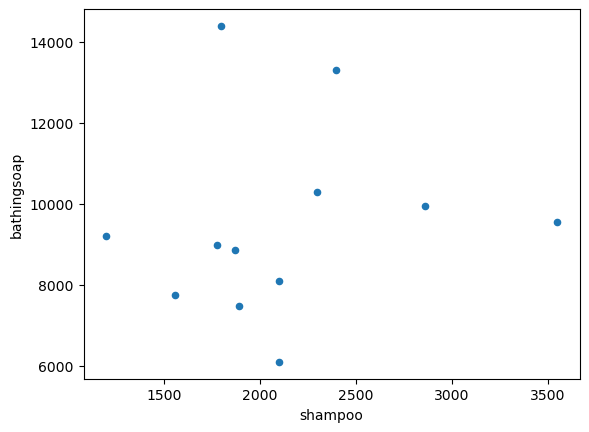

In [20]:
datos.plot('shampoo','bathingsoap',kind = 'scatter')

In [47]:
np.corrcoef(datos.shampoo,datos.bathingsoap)

array([[1.        , 0.13756757],
       [0.13756757, 1.        ]])

In [48]:
stats.pearsonr(datos.shampoo,datos.bathingsoap) # devuelve la correlacion y el p-valor

(0.1375675688230804, 0.669853167345746)

In [49]:
stats.spearmanr(datos.shampoo,datos.bathingsoap)   # Spearman's rho

SpearmanrResult(correlation=0.2907184843604137, pvalue=0.35929281767147814)

In [50]:
stats.kendalltau(datos.shampoo,datos.bathingsoap)  # Kendall's tau

KendalltauResult(correlation=0.10687334289668038, pvalue=0.6304167324095719)

Interpretación de la correlación:

-  La correlación esta siempre entre -1 y 1. Lo primero que se interpreta es el signo
-  Directamente proporcional si es positivo, si es negativo pasa lo contrario
-  En segundo lugar se interpreta es la fuerza de la relación. Si esta más cerca de 1, significa que si aumenta una variable, la otra también.
-  Números intermedios, reducen la fuerza de la relación.